In [12]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tifffile as tiff 

In [22]:
# https://www.kaggle.com/paulorzp/rle-functions-run-length-encode-decode
def mask2rle(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)
 
def rle2mask(mask_rle, shape=(1600,256)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

In [18]:
class config:
    seed = 1717
    base_path = "./hubmap-organ-segmentation"
    train_metadata = os.path.join(base_path, "train.csv")
    test_metadata = os.path.join(base_path, "test.csv")
    train_images = os.path.join(base_path, "train_images")
    test_images = os.path.join(base_path, "test_images")

In [54]:
! python3 -m pip install medpy

     |████████████████████████████████| 151 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 48.4 MB 10.4 MB/s eta 0:00:01
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214958 sha256=8e72fd690d0fab4f951af3b1e2484df67f192c322092909ad594cf7f209cc222
  Stored in directory: /home/panser/.cache/pip/wheels/fc/38/7d/e0b8bcb2770f779a93cab5ab7fa6dd344011e1278cb90cab86
Successfully built medpy


In [55]:
from medpy.io import load

In [56]:
img = load(os.path.join(config.train_images, "62.tiff"))

/home/panser/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:701: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

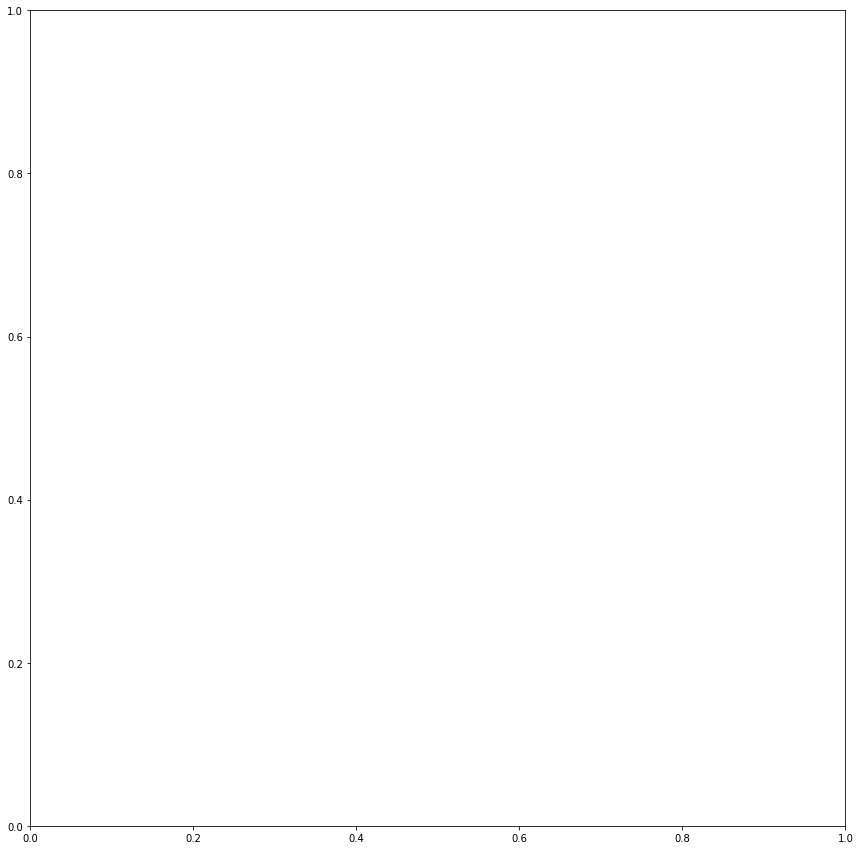

In [58]:
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis("off")

In [50]:
img_1 = tiff.imread(os.path.join(config.train_images, "62.tiff"))

In [51]:
img_1.shape

(3000, 3000, 3)

In [48]:
img_1[:500, :, :].shape

(500, 3000, 3)

(-0.5, 2999.5, 499.5, -0.5)

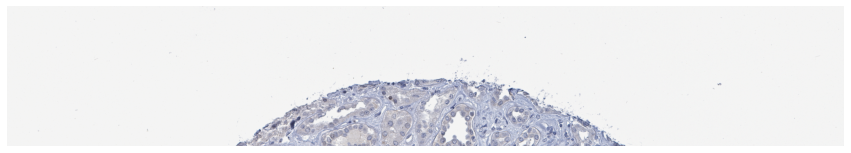

In [49]:
plt.figure(figsize=(15, 15))
plt.imshow(img_1[:500, :, :])
plt.axis("off")

In [24]:
df = pd.read_csv(config.train_metadata)

In [25]:
df.head()

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female


In [42]:
df[df["img_height"] != df["img_width"]]

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex


In [27]:
df[df["id"] == 62]

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
302,62,kidney,HPA,3000,3000,0.4,4,4382055 23 4385050 34 4388048 44 4391045 57 43...,59.0,Male


In [28]:
df[df["id"] == 62]["rle"]

302    4382055 23 4385050 34 4388048 44 4391045 57 43...
Name: rle, dtype: object

In [33]:
mask_1 = rle2mask(df[df["id"] == 62]["rle"].iloc[-1], (img_1.shape[1], img_1.shape[0]))
mask_1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(-0.5, 2999.5, 2999.5, -0.5)

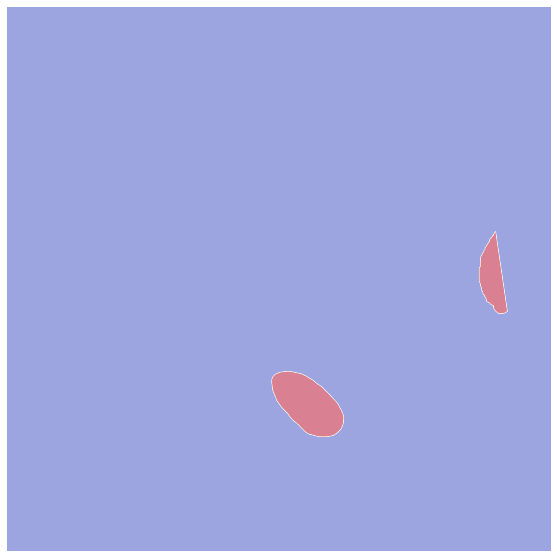

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(mask_1, cmap='coolwarm', alpha=0.5)
plt.axis("off")


(-0.5, 2999.5, 2999.5, -0.5)

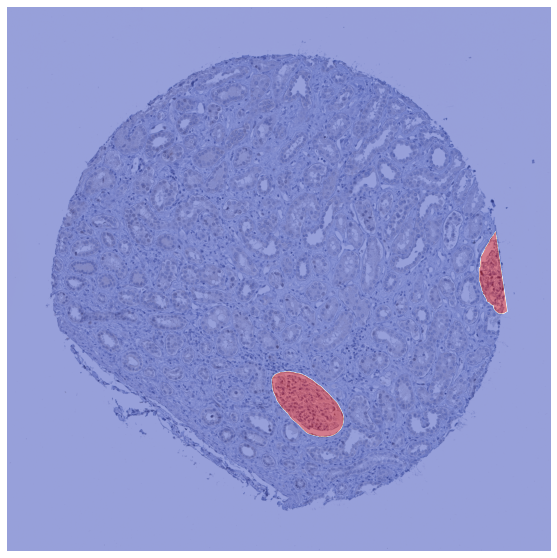

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(img_1)
plt.imshow(mask_1, cmap='coolwarm', alpha=0.5)
plt.axis("off")